In [0]:
!pip install opencv-python==3.4.2.16 && pip install opencv-contrib-python==3.4.2.16 # ! to run code in the terminal, opencv-contrib to get the patent

In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

import glob

img_files = glob.glob('/content/gdrive/My Drive/training set/16 trainning/*.png')
print(img_files)

In [0]:
imgs_data = [cv2.imread(image,0) for image in img_files ]


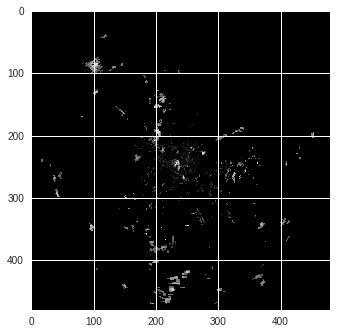

In [0]:
imgs_data[0]
plt.imshow(imgs_data[0],cmap = 'gray')

In [0]:
fast = cv2.FastFeatureDetector_create()
sift = cv2.xfeatures2d.SIFT_create()
orb = cv2.ORB_create()
trace_save ={}
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)


In [0]:
sift_results = {}


In [0]:
for ind, img in enumerate(imgs_data):
  kp = fast.detect(img,None)
  kp, des = sift.compute(img,kp)
  sift_results[ind] = (kp, des)

  if ind == 0:
    des_stack = des[:]
  else :
    des_stack = np.vstack([des_stack,des])

In [0]:
print(des_stack.shape)     # every descripter have 128 elements, and descriptors are stacked 

(410002, 128)


In [0]:
from sklearn.cluster import KMeans
N_centroids = 8

In [0]:
k_means = KMeans(init='k-means++', n_clusters=N_centroids, n_init=10,random_state=23)
k_means.fit(des_stack)
k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)


In [0]:
k_means_cluster_centers.shape

(8, 128)

In [0]:
kp_name = map(lambda x:'kp'+ str(x).zfill(2), np.arange(1,N_centroids+1))
hist_bin = np.arange(-0.5,N_centroids+0.5)

In [0]:
from sklearn.metrics.pairwise import pairwise_distances_argmin

In [0]:
for ind, img in enumerate(imgs_data):
  kp, des = sift_results[ind]
  des_class = pairwise_distances_argmin(des, k_means_cluster_centers)
  des_hist = np.histogram(des_class,hist_bin)[0]

In [0]:
print(des_hist)


[  3  10  68 192 281 197   0   0]
